# 1/Import Libraries

In [1]:
import os
import numpy as np 
import pandas as pd 

# For Train Test split
from sklearn.model_selection import train_test_split
#For using Ensemble model - Adaboost
from sklearn.ensemble import AdaBoostClassifier
# For Finding otimum hyperparameter on Adaboost
from sklearn.model_selection import GridSearchCV
# For Diagnosis of classification model
from sklearn.metrics import classification_report
# To ignore warning messages
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# 2/Import Data

In [2]:
data = pd.read_csv('../input/ipba-12-unext-jigsaw-classification-case-study/train.csv',na_values=" ")

# 3/Data Sanity

In [3]:
# Check for missing values and treating them
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
Churn               0
dtype: int64

In [4]:
data.TotalCharges.fillna(value=data.TotalCharges.mean(), inplace=True)

In [5]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
# Check for proper data types on variables
data.info()
data.SeniorCitizen = data.SeniorCitizen.astype(object)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5282 non-null   object 
 1   gender            5282 non-null   object 
 2   SeniorCitizen     5282 non-null   int64  
 3   Partner           5282 non-null   object 
 4   Dependents        5282 non-null   object 
 5   tenure            5282 non-null   int64  
 6   PhoneService      5282 non-null   object 
 7   MultipleLines     5282 non-null   object 
 8   InternetService   5282 non-null   object 
 9   OnlineSecurity    5282 non-null   object 
 10  OnlineBackup      5282 non-null   object 
 11  DeviceProtection  5282 non-null   object 
 12  TechSupport       5282 non-null   object 
 13  StreamingTV       5282 non-null   object 
 14  StreamingMovies   5282 non-null   object 
 15  Contract          5282 non-null   object 
 16  PaperlessBilling  5282 non-null   object 


0.6541128538327665

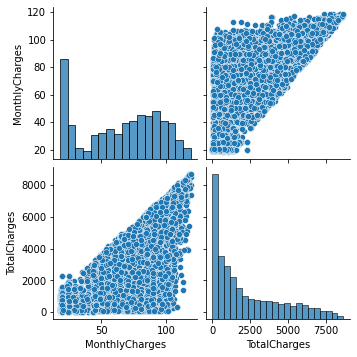

In [7]:
import seaborn as sns
# High Correlation between Monthly Charges and Total charges, drop monthly charges from model
sns.pairplot(data[["MonthlyCharges","TotalCharges"]])
correlation = data['MonthlyCharges'].corr(data['TotalCharges'])
correlation

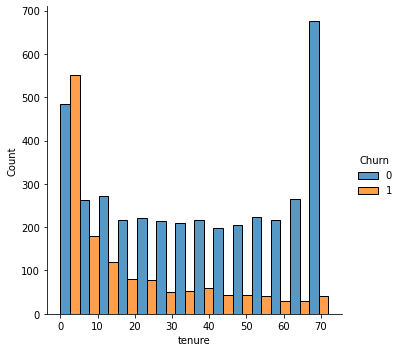

In [8]:
# Plot tenure to identify distribution against churn
sns.displot(data, x="tenure", hue="Churn", multiple="dodge")

In [9]:
# Binning tenure for effecient model
condition = [
    (data['tenure'] <= 20),
    (data['tenure'] > 20) & (data['tenure'] <= 40),
    (data['tenure'] > 40) & (data['tenure'] <= 60),
    (data['tenure'] > 60)
]

# Create list of categorical values related to these conditions
values = ['short','moderate','medium','long']

# Create a new column
data['tenure_bucket'] = np.select(condition,values)
data['tenure_bucket'].value_counts()

short       2168
long        1061
moderate    1050
medium      1003
Name: tenure_bucket, dtype: int64

# 4/Prepare for Train-Test split

In [10]:
# Separate out Predictor and Target variables
y = data['Churn']
X = data.drop(['customerID','Churn','tenure','MonthlyCharges'], axis = 1)

In [11]:
# One hot encoding on predictors
X=pd.get_dummies(X)
X.head()

,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_bucket_long,tenure_bucket_medium,tenure_bucket_moderate,tenure_bucket_short
0,3784.00,1,0,1,0,0,1,0,1,1,...,1,0,0,1,0,0,1,0,0,0
1,193.60,1,0,1,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
2,1238.65,0,1,1,0,1,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
3,5124.60,0,1,1,0,1,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
4,723.40,1,0,1,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1


In [12]:
# Execute Train and Test split, using Stratified sampling
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=400,stratify=y)

# 5/Execute ML Model - ADABOOST

In [13]:
# Establish the model
clf=AdaBoostClassifier(random_state=400)

In [14]:
clf.fit(X_train, y_train)

AdaBoostClassifier(random_state=400)

In [15]:
# Check how the model performed on Train dataset
clf.score(X_test,y_test)

0.8174077578051088

In [16]:
# Using n_estimator for basic search
#mod=GridSearchCV(clf,param_grid={'n_estimators':[80,100,120,140,160,180]},n_jobs=-1,scoring='accuracy')
# For the optimum value of hyperparameter into Train dataset
#mod.fit(X_train,y_train)

In [17]:
# Get the best estimator printed
#best_estimator = mod.best_estimator_
best_estimator = clf
best_estimator

AdaBoostClassifier(random_state=400)

In [18]:
best_estimator.score(X_test,y_test)

0.8174077578051088

# 6/Predict target variable using ML Model

In [19]:
y_train_predicted = best_estimator.predict(X_train)
y_test_predicted = best_estimator.predict(X_test)

In [20]:
# Check performance
from sklearn import metrics

print(classification_report(y_train, y_train_predicted))
print('AUC =',metrics.roc_auc_score(y_train, y_train_predicted))

print(classification_report(y_test, y_test_predicted))
print('AUC =',metrics.roc_auc_score(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      3104
           1       0.68      0.56      0.61      1121

    accuracy                           0.81      4225
   macro avg       0.77      0.73      0.75      4225
weighted avg       0.81      0.81      0.81      4225

AUC = 0.7320178216706364
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       776
           1       0.69      0.58      0.63       281

    accuracy                           0.82      1057
   macro avg       0.77      0.74      0.75      1057
weighted avg       0.81      0.82      0.81      1057

AUC = 0.7405758153868732


# 7/Load Test dataset

In [21]:
# Load original
test = pd.read_csv('../input/ipba-12-unext-jigsaw-classification-case-study/test.csv',na_values=" ")
# Create a copy
test1 = test
# Look for NAs
test1.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        3
dtype: int64

In [22]:
# Treat NAs in Test dataset
test1.TotalCharges.fillna(value=test1.TotalCharges.mean(), inplace=True)
test1.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [23]:
# Create proper data types on predictors
test1.info()
test1.SeniorCitizen = test1.SeniorCitizen.astype(object)
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1761 non-null   object 
 1   gender            1761 non-null   object 
 2   SeniorCitizen     1761 non-null   int64  
 3   Partner           1761 non-null   object 
 4   Dependents        1761 non-null   object 
 5   tenure            1761 non-null   int64  
 6   PhoneService      1761 non-null   object 
 7   MultipleLines     1761 non-null   object 
 8   InternetService   1761 non-null   object 
 9   OnlineSecurity    1761 non-null   object 
 10  OnlineBackup      1761 non-null   object 
 11  DeviceProtection  1761 non-null   object 
 12  TechSupport       1761 non-null   object 
 13  StreamingTV       1761 non-null   object 
 14  StreamingMovies   1761 non-null   object 
 15  Contract          1761 non-null   object 
 16  PaperlessBilling  1761 non-null   object 


In [24]:
# Create a list of conditions for bucketing
condition = [
    (test1['tenure'] <= 20),
    (test1['tenure'] > 20) & (test1['tenure'] <= 40),
    (test1['tenure'] > 40) & (test1['tenure'] <= 60),
    (test1['tenure'] > 60)
]

# Create list of categorical values related to these conditions
values = ['short','moderate','medium','long']

# Create a new column
test1['tenure_bucket'] = np.select(condition,values)
test1['tenure_bucket'].value_counts()

short       710
moderate    358
medium      347
long        346
Name: tenure_bucket, dtype: int64

# 8/Prepare Test dataset for Adaboost ML model

In [25]:
test1 = test1.drop(['customerID','tenure','MonthlyCharges'], axis = 1)
test1 = pd.get_dummies(test1)
test1.head()

,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_bucket_long,tenure_bucket_medium,tenure_bucket_moderate,tenure_bucket_short
0,4297.6,1,0,1,0,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,838.5,1,0,1,0,0,1,0,1,0,...,1,0,1,0,0,0,0,0,1,0
2,521.0,0,1,1,0,0,1,0,1,1,...,1,0,0,1,0,0,0,0,0,1
3,85.0,0,1,1,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
4,2554.0,0,1,1,0,0,1,0,1,1,...,1,0,0,0,0,1,0,1,0,0


# 9/Predict Target variable on Test dataset using Adaboost ML model

In [26]:
# Fit the model and predict
test_predicted = best_estimator.predict(test1)
# Length of predicted values
len(test_predicted)

1761

# 10/Create submission

In [27]:
test['Churn'] = test_predicted
submission = test[['customerID','Churn']]
submission.to_csv('submission.csv',index=False)